In [1]:
import caffe
import numpy as np
from skimage import color
import skimage
import imageio
import matplotlib.pyplot as plt

caffe.set_mode_cpu()
net = caffe.Net('lenet_deploy.prototxt', 'lenet_iter_10000.caffemodel', caffe.TEST)

[[[ 0.99607843  0.99607843  0.99215686]
  [ 0.99607843  0.99607843  0.99215686]
  [ 0.99607843  0.99607843  0.99215686]
  ..., 
  [ 0.99607843  0.99607843  0.99215686]
  [ 0.99607843  0.99607843  0.99215686]
  [ 0.99607843  0.99607843  0.99215686]]

 [[ 0.99607843  0.99607843  0.99215686]
  [ 0.99607843  0.99607843  0.99215686]
  [ 0.99607843  0.99607843  0.99215686]
  ..., 
  [ 0.99607843  0.99607843  0.99215686]
  [ 0.99607843  0.99607843  0.99215686]
  [ 0.99607843  0.99607843  0.99215686]]

 [[ 0.99607843  0.99607843  0.99215686]
  [ 0.99607843  0.99607843  0.99215686]
  [ 0.99607843  0.99607843  0.99215686]
  ..., 
  [ 0.99607843  0.99607843  0.99215686]
  [ 0.99607843  0.99607843  0.99215686]
  [ 0.99607843  0.99607843  0.99215686]]

 ..., 
 [[ 0.99607843  0.99607843  0.99215686]
  [ 0.99607843  0.99607843  0.99215686]
  [ 0.99607843  0.99607843  0.99215686]
  ..., 
  [ 0.99607843  0.99607843  0.99215686]
  [ 0.99607843  0.99607843  0.99215686]
  [ 0.99607843  0.99607843  0.99215

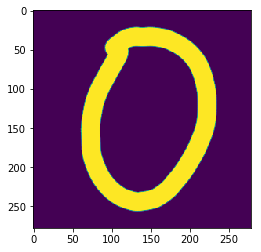

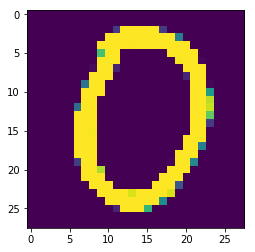

(28, 28)
Sum =  149.787872484
1.0
(1, 10)
Number: 0
[[  9.99998331e-01   4.70414766e-12   2.36230457e-09   1.50749205e-13
    3.88390600e-13   4.96161202e-11   1.69564771e-06   3.07304293e-10
    1.89117139e-10   2.24180605e-11]]
0.999998


In [7]:
img = caffe.io.load_image('sketch-0.png')

# plt.imshow(im)
# plt.show()

print(img)
img_gray = color.rgb2gray(img)
img_gray = 1 - img_gray # invert the white background image

plt.imshow(img_gray)
plt.show()

img_gray_resized = skimage.transform.resize(img_gray, (28, 28), mode='constant')
plt.imshow(img_gray_resized)
plt.show()
print(img_gray_resized.shape)

print("Sum = ", np.sum(img_gray_resized))
net.blobs['data'].data[...] = img_gray_resized[np.newaxis, np.newaxis, :, :]

out = net.forward()
print(np.sum(out['prob']))
print(out['prob'].shape)
print("Number:", out['prob'].argmax())
print(out['prob'])
print(out['prob'].max())
# print(out['argmax'])